## Poverty Assessment: Pamplona Alta
### Caja del Amor Survey Results
### Sean O'Malley

#### Project

Every year, in partnership with the Solidaridad en Marcha, Catholic churches throughout the city of Lima, Peru deliver thousands of Christmas gift boxes to the poorest residents in the city. The campaign, called Caja Del Amor, has been in operation for years and has subsequently built long-term and well-sustained relationships with many community leaders in these areas. 


The list of gift recipients is built in coordination with the local community leaders, most of whom oversee around 150 families. These leaders choose the 5 to 10 families in most need of assistance in their respective community to receive the gift boxes.


These networks served as a point of strength when we began to explore the creation of an in-depth survey to better understand the poorest urban populations in Peru. However, our focus needed to also be on action-ability of insight and the concrete opportunity of enacting positive change in the lives those we surveyed. 


Therefore, we decided to focus on a region of high need, and an area where Solidaridad en Marcha had a significant footprint. This process of elimination lead us to the region of Pamplona Alta near the San Juan de Miraflores municipality of Lima.

#### Understand Pamplona Alta

Pamplona Alta is a shanty town riddled with extreme poverty, it has an absence of infrastructure, and a large portion of its community is without access to many basic human needs. The region has no public works, no paved roads, no public electricity, nor public access to water and sewage. If these services exist at all, they are provided by private companies at a premium price.


Water trucks provide the only (non-drinkable) water and they often cannot access many of the homes, especially in the upper portions of the region. Shallow latrines serve as a poor substitute for sewage and along with the pig farms, contribute to a high rate of parasitic infections, particularly among children.


The area was first populated in the 1990’s as a result of a decade of terrorism that affected the entire country of Peru. During that period, populations from the surrounding regions began a mass migration to the outskirts of Lima, leaving the lives they knew to find safety in the proximity of the city. Many only spoke Quechua, few had employment for years after arrival, and none of these new residents owned the land on the edge of Lima where they would now call home.

In the opinion of many close to the matter, it has predominantly been this issue of land ownership that has ensured the continued impoverishment of the people of Pamplona Alta. Why land ownership? Well, owning the land is necessary, according to the government of Peru, for those in Pamplona Alta to receive basic municipal services. In order to attain roads, plumbing, water, schools and many other basic human needs, they must first own the land on which their homes sit.

The land is rocky, mountainous and un-arable, yet to the people of Pamplona Alta, it is home. Inside of this difficult landscape, there are two prevailing realities: those who squatted on public land and those who squatted on private land.

The valleys of this mountainous region were owned predominantly by pig farmers upon arrival, and even today many families live side by side to pigs in the lower part of Pamplona Alta. The owners of the land have lacked the resources to forcibly evict their unwanted tenants since their arrival, yet these tenants have now called Pamplona Alta home for over 20 years and despite their best hopes, still, have a nearly impossible chance of owning the land on which their homes sit. As a result, many of these structures lack stewardship, the inability to own does not reasonably warrant investment and in turn, the homes exist in squalor.


The story of those in the upper mountain portions of Pamplona Alta is a different, yet only a slightly less dire narrative. For people who have built their homes on government-owned land, ownership is possible, however, only after a laundry list of nearly impossible requirements, given by the government of Peru, is achieved. Land ownership is possible to those who squatted on government land if they have: 

*	been there for longer than 5 years
*	access to water
*	access to electricity
*	safe access to home
*	community centers/parks within close proximity of their house


In practice, the government of Peru is asking the poorest and least advantaged people in their country to not only sustain life on a few dollars a day, but also build a road to create access for a privately priced water truck to get to their home, to pay to bring privately priced electricity to their home, to build community centers and to construct safe access to their homes from the bottom of the mountain. 

This task is absolutely impossible on their own, and organizations like Solidaridad en Marcha have helped make home ownership a reality to some of the people of Pamplona Alta, however, this battle is still uphill, and full of rocks and mud.

The subsequent reality for the people of Pamplona Alta is that their children are frequently sick, their jobs are too far away, their under-education is inevitable, many families are broken and the lack of government support ensures the existence of a dark economy, thus extending their lack of access to upward mobility. 

Deeper than these economic indicators of poverty, the people of Pamplona suffer from the poverty of dignity. Many members refer to themselves as “the forgotten ones,” election promises come and go without much change and through the confusing red tape and legalities, they still find themselves without access to basic human needs.

#### Data

Understanding the many facets of those in Pamplona Alta was integral in the way we built our survey, the questions we asked, and the way we asked them. We raised some questions that we heuristically had an intuitive idea of the answer, but needed to understand the severity. Yet, others we asked in order to gain insight into the tools we may have available to us within our solution set. 

Lastly, we inquired of economic indicators, religious factors and family structure. All intended to paint a picture of the lives of those in Pamplona Alta and to possibly determine causality between the various characteristics.  

We were able to fully survey over 500 families and after extracting all personably identifiable data, we built a dataset that held great potential for a greater understanding of the lives of those in Pamplona Alta and the possible routes available to help them.

The completed dataset built from the original survey contains 21 variables and 507 observations of which to explore, visualize and perform analysis on. The complete dataset can be found on my GitHub account, here. Also note, for binary variables, 1 is yes and 0 is no.

1.	__fam_n__	– _numeric factor_ – Unique identifier for each family.
2.	__internet__ – _binary_ – Does your phone have internet?
3.	__agua__ –	_binary_ – Can the water truck get to your house?
4.	__banco__ – _binary_ – Do you have a bank account?
5.	__iglesia__ – _binary_ – Do you go to church at least once a month?
6.	__dejar_hijos__ –  _binary_ – Do you leave your children home alone (when you go to work)?
7.	__cuantas_personas__ – _numeric_ – How many people live in your house?
8.	__tiempo_casa__ – _numeric_ – How long have you lived in your house?
9.	__primer_hijo__ – _numeric_ – At what age did you have your first child?
10.	__cuantas_trabajan__ – _numeric_ – How many people in your house work?
11.	__tiempo_trabajan__ – _numeric_ – How long does it take to get to your job?	
12.	__pierden_colegio__ – _numeric_ – How many days a month do your children miss school?
13.	__ingreso__ – _numeric_ – What is your monthly household income?
14.	__bautizadas__ – _numeric_ – How many people in your family are baptized?
15.	__direccion__ – _character factor_ – Name of neighborhood.
16.	__padre__ – _binary_ – Does the father of the children live in the home?
17.	__madre__ – _binary_ – Does the mother of the children live in the home?
18.	__F__ – _numeric_ – Count of females in the home.
19.	__M__ – _numeric_ – Count of males in the home.
20.	__niños__ – _numeric_ – Count of children 18 and younger in the home.
21.	__mayores__ – _numeric_ – Count of adults 65 and older in the home.

Months of conversations, meetings, reading and collaboration with community members came into building this survey. Qualitative analysis helped us produce a dataset that has the potential to perform multiple quantitative analyses that are relevant and informed; and it is from this point that we will now follow the flow of a data science analysis. 

#### Process

Reminder: I will at times use technical language, but I encourage you to keep reading through, because I will also accompany every scientific insight with an explanation in simple language, relevant to the question at hand.

We will begin by exploring the variables, the average values and basic correlations, visualizing how characteristics behave with one another. Following our exploratory phase, we will inspect cause and effect relationships between pairs of variables, as well as predict specific variables using all available data. I will use multiple techniques to perform this analysis of causality in hopes of providing variable importance in the prediction of key factors of the poor. The result will be a set of priorities for aid workers to pursue in the betterment of certain economic or societal indicators.


The succeeding analysis will be that of understanding natural segments that exist within the poorest of the poor. Again, using multiple techniques, I will attempt to determine the groups of people that exist within those surveyed. What commonalities do certain segments have? How can we target aid campaigns to help certain groups? These are a few of the many questions a segmentation analysis will help us answer.

Our quantitative and qualitative analyses will come to fruition in the final recommendation portion of this process. We will present questions and provide actionable insight into those questions, as determined by our analysis. We will build a road map for aid, a list of how we can help, who we can help and the logistical suggestions to do so. Our intent is to tie every insight to action and offer suggestions as to the best action available given what we have learned from the analysis. So, let’s get started!

#### Import Packages

In [818]:
# core
import pandas as pd
import numpy as np
import os
import operator

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# logistical regression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# linear regression
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import zscore

Ingest the raw data from its github location

In [819]:
github_file_location = "https://raw.githubusercontent.com/showmalley/SeanOMalleyCodePortfolio/master/Development%20Economics/PovertySurveys/CDA_FULL_2018.csv"

df = pd.read_csv(github_file_location, encoding="ISO-8859-1").iloc[:,1:]

We need to explore the datatypes to unsure correct formatting. It looks like we only need to alter the FAM_N and DIRECCION variables to be categorical. 

In [820]:
df.FAM_N = df.FAM_N.astype('category')
df.DIRECCION = df.DIRECCION.astype('category')
print(df.dtypes)

FAM_N               category
internet             float64
agua                 float64
banco                float64
iglesia              float64
dejar_hijos          float64
cuantas_personas       int64
tiempo_casa          float64
primer_hijo          float64
cuantas_trabajan     float64
tiempo_trabajan      float64
pierden_colegio      float64
ingreso              float64
bautizadas           float64
DIRECCION           category
PADRE                float64
MADRE                float64
F                    float64
M                    float64
NINOS                float64
MAYORES              float64
dtype: object


All looks well, lets move on to explore the data itself. First with summary statistics. 

In [821]:
df.describe()

,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,tiempo_trabajan,pierden_colegio,ingreso,bautizadas,PADRE,MADRE,F,M,NINOS,MAYORES
count,498.000000,493.000000,503.000000,500.000000,486.000000,505.000000,495.000000,476.000000,479.000000,409.000000,344.000000,441.000000,440.000000,502.000000,502.000000,499.000000,499.000000,499.000000,499.000000
mean,0.106426,0.705882,0.035785,0.874000,0.403292,5.043564,14.225859,20.918067,1.281837,1.171883,1.962791,682.380952,2.650000,0.551793,0.970120,2.543086,2.036072,2.603206,0.058116
std,0.308692,0.456108,0.185939,0.332182,0.491064,1.958418,8.601098,4.806532,0.763925,0.690369,2.318429,576.150332,1.838651,0.497806,0.170427,1.240080,1.270100,1.521885,0.258644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,18.000000,1.000000,0.600000,0.000000,430.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,15.000000,20.000000,1.000000,1.000000,2.000000,700.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,18.000000,23.000000,1.000000,2.000000,3.000000,850.000000,4.000000,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,50.000000,45.000000,7.000000,3.000000,22.000000,8500.000000,10.000000,1.000000,1.000000,8.000000,6.000000,8.000000,2.000000


Looking above, we have a few checks we need to take care of. Look to min and max to identify unreasonable outliers. Once this is controlled for, looking at the mean values can give us our first brief insight into the lives of the data we have ingested

__Outliers__

The only data changes I see that need changed is the age of the first child and people living in each house. 
* We know no one at age 0 can have a child, so lets control for this by saying any value under 11 is NaN. 
* Also, 0 people cannot live in a household, so where the value is 0, lets impute 1
* Additionally, there are two observations that are upwards of 5 standard deviations above the next highest income result, this is presumably a typo or someone that absolutely does not apply to this population sample, so I have made the choice to remove it.

In [822]:
df.loc[df.primer_hijo < 12, 'primer_hijo'] = np.nan
df.loc[df.cuantas_personas < 1, 'primer_hijo'] = 1
df = df[(df['ingreso'] < 3000)]

In [823]:
df.describe()

,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,tiempo_trabajan,pierden_colegio,ingreso,bautizadas,PADRE,MADRE,F,M,NINOS,MAYORES
count,434.000000,430.000000,437.000000,434.000000,423.000000,439.000000,434.000000,417.000000,433.000000,384.000000,313.000000,439.000000,396.000000,436.000000,436.000000,434.000000,434.000000,434.000000,434.000000
mean,0.110599,0.700000,0.038902,0.887097,0.425532,5.109339,14.098618,21.105516,1.295612,1.164844,1.940895,649.043280,2.585859,0.548165,0.965596,2.589862,2.023041,2.633641,0.052995
std,0.313997,0.458791,0.193582,0.316840,0.495009,1.986686,8.730716,4.750343,0.779009,0.688559,2.393338,294.448824,1.836398,0.498246,0.182473,1.246700,1.258477,1.539885,0.234354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,18.000000,1.000000,0.600000,0.000000,425.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,15.000000,20.000000,1.000000,1.000000,2.000000,680.000000,2.000000,1.000000,1.000000,2.500000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,18.000000,23.000000,1.000000,1.562500,3.000000,850.000000,4.000000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,50.000000,45.000000,7.000000,3.000000,22.000000,2080.000000,10.000000,1.000000,1.000000,8.000000,6.000000,8.000000,2.000000


Now looking to the binary values, lets get the proportion of YES to NO answers.

In [824]:
binaries = ['internet','agua','banco','iglesia','dejar_hijos','PADRE','MADRE']

for i in range(len(binaries)):
    print('---')
    print(str(round(df[binaries[i]].mean()*100,2)) + "% of those surveyed answered YES to " + str(binaries[i]))
    
print('---')

---
11.06% of those surveyed answered YES to internet
---
70.0% of those surveyed answered YES to agua
---
3.89% of those surveyed answered YES to banco
---
88.71% of those surveyed answered YES to iglesia
---
42.55% of those surveyed answered YES to dejar_hijos
---
54.82% of those surveyed answered YES to PADRE
---
96.56% of those surveyed answered YES to MADRE
---


We can see that a small proportion of those surveyed had bank accounts and internet access, while a large proportion went to church regularly and a majority had access to drinkable water though not overwhelmingly so. In terms of family dynamics, we see that only half of fathers are present in the home and most homes have a mother present. 

The initial pulse we get from the binary proportional averages is that we can affirm some of our pre-conceived ideas surrounding broken families and presence of a dark economy implying sparse routes to traditional credit sources. 

Next, let's take a look at the average values of our numeric survey variables.

In [825]:
numerics = ['cuantas_personas','tiempo_casa','primer_hijo','cuantas_trabajan','tiempo_trabajan','pierden_colegio','ingreso','bautizadas', 'F','M','NINOS','MAYORES']

for i in range(len(numerics)):
    print('---')
    print("The average value for " + str(numerics[i]) + " is " + str(round(df[numerics[i]].mean(),2)))
    
print('---')

---
The average value for cuantas_personas is 5.11
---
The average value for tiempo_casa is 14.1
---
The average value for primer_hijo is 21.11
---
The average value for cuantas_trabajan is 1.3
---
The average value for tiempo_trabajan is 1.16
---
The average value for pierden_colegio is 1.94
---
The average value for ingreso is 649.04
---
The average value for bautizadas is 2.59
---
The average value for F is 2.59
---
The average value for M is 2.02
---
The average value for NINOS is 2.63
---
The average value for MAYORES is 0.05
---


Inspecting the numeric means of our survey results, we can begin to get a sense of the lives lead by the poorest of the poor in Pamplona Alta. We see that the average age of the first child is 21, which is young by developed world standards, but not nearly as young as our qualitative guess would have assumed; thus looking into the distribution of this variable could provide further insight.

We see that the average time in the home is nearly triple the required 5 year requirement of the government for ownership, which is one good step forward. However, we also see that the average household of 5 is usually living off of the salary of a single person, and that average value is only 682 soles a month ($6.60 USD a day). 

Looking to the religious aspects of the survey, it is also interesting to note that on average only 2/5 members of households are baptized though a majority attend church services regularly.

Now, we do not want to make any extraneous assumptions from these averages, nevertheless, these initial figures have allowed us to paint a faint picture of the lives lead by those surveyed.

#### Distributions

Average values can give us a glimpse into the character of a variable, however, the distribution can tell us even more. Given the above results I wanted to take the time to look into certain variables of intrigue. This process gives shape to the values within, as well as helps us spot outliers that may have significantly affected our larger groups at whole. 

Given the average values of these two _Time in Home_ and _Age of First Child_ I was curious as to the distribution of those variables. 

In [826]:
sns.set_style('darkgrid')
sns.set(color_codes = True)

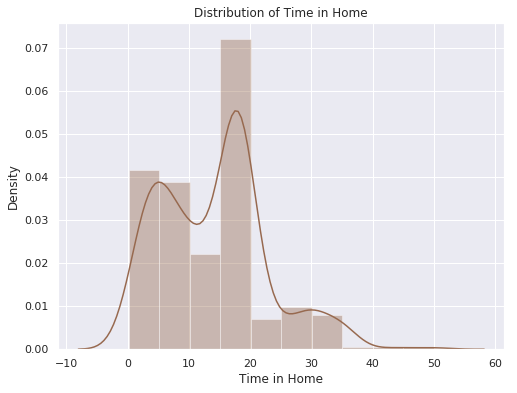

In [827]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.tiempo_casa[df['tiempo_casa'].isna() == False],ax=ax, color = '#97694F', bins = 10)
ax.set(xlabel = "Time in Home",ylabel = "Density", title = "Distribution of Time in Home")
plt.show()

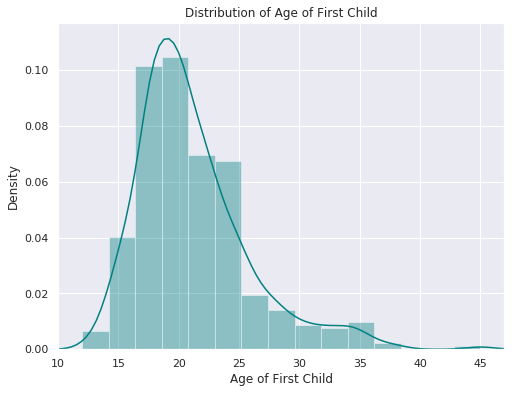

In [828]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.primer_hijo[df['primer_hijo'].isna() == False],ax=ax, color = 'teal', bins = 20)
ax.set(xlabel = "Age of First Child", xlim=(10,47), ylabel = "Density", title = "Distribution of Age of First Child")
plt.show()

The third distribution is household size, the values are, more or less, normally distributed, with a majority of the households being between 4 and 6 people per household. We can see that there are some houses with as many as 15, but that number is small enough that those outliers should hold little weight to our predictive modeling further on.

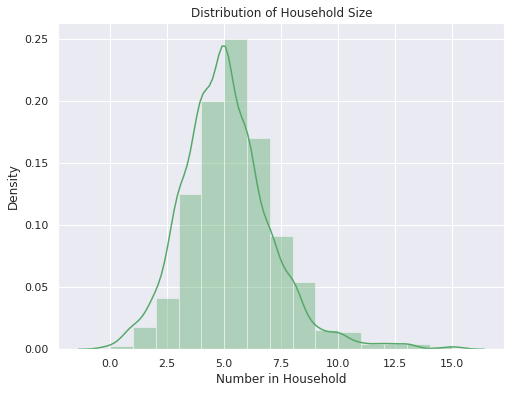

In [829]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['cuantas_personas'],ax=ax, color = 'g', bins = 15)
ax.set(xlabel = "Number in Household",ylabel = "Density", title = "Distribution of Household Size")
plt.show()

Next, looking to commute time, we see a mostly bi-modal distribution, with a majority of people traveling just over an hour to work, and another traveling over two hours to work. This confirms the difficulty we’ve seen for people in Pamplona Alta to find employment near to home.

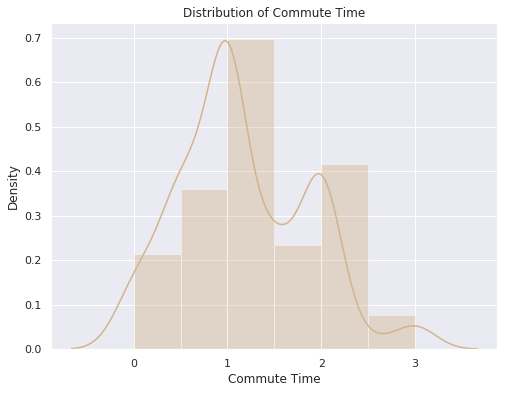

In [830]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.tiempo_trabajan[df['tiempo_trabajan'].isna() == False],ax=ax, color = 'tan', bins = 6)
ax.set(xlabel = "Commute Time",ylabel = "Density", title = "Distribution of Commute Time")
plt.show()

Lastly, we see the distribution of household income below, and something feels a little off. We see that there are two significant outliers of income to the group at large. This suggests that our average value of income has been significantly pulled upward by these two observations. Moving forward, we will have to proceed with caution as we attempt to measure the reality of the large majority of those in Pamplona Alta, and not allow outliers to affect our understanding of the community at large.

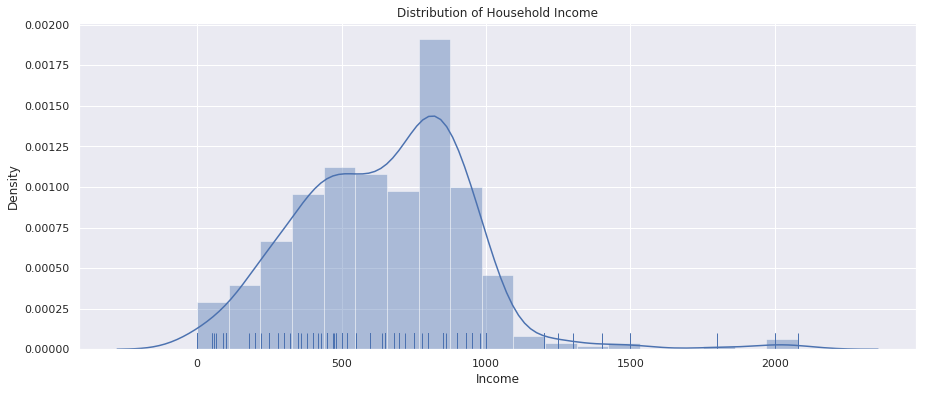

In [831]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df.ingreso[(df['ingreso'].isna() == False)],ax=ax, color = 'b', rug = True)
ax.set(xlabel = "Income",ylabel = "Density", title = "Distribution of Household Income")
plt.show()

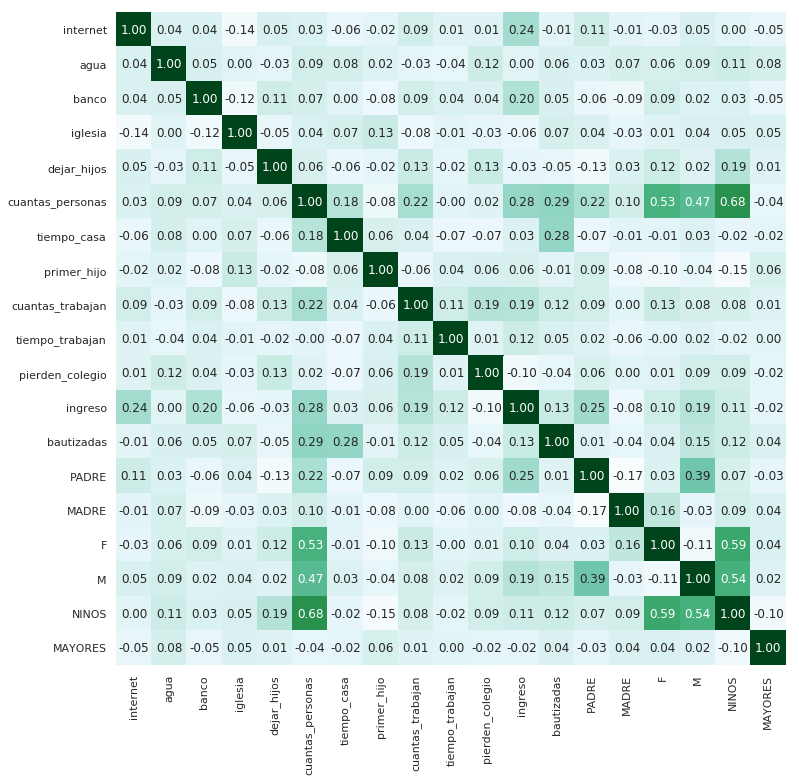

In [832]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), cbar=False, cmap="BuGn",annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The plot above is discouraging, we are seeing largely weak correlations between variables, meaning that the predictive power of models ahead could be difficult to come by. Nevertheless, we see stronger correlations between factors like income and internet, number of workers and leaving kids at home, as well as fathers in home and household size.

Due to the correlation matrix not giving us solid results, we will have to keep in mind the stronger positive / negative correlations and move forward with more analysis.

### Pre-Process Data for Regression

In [833]:
# Optimize dataset for modeling
    # impute & remove missing values for modeling
    
imp_dict = dict(df.isnull().sum())
imp_dict

{'DIRECCION': 3,
 'F': 5,
 'FAM_N': 3,
 'M': 5,
 'MADRE': 3,
 'MAYORES': 5,
 'NINOS': 5,
 'PADRE': 3,
 'agua': 9,
 'banco': 2,
 'bautizadas': 43,
 'cuantas_personas': 0,
 'cuantas_trabajan': 6,
 'dejar_hijos': 16,
 'iglesia': 5,
 'ingreso': 0,
 'internet': 5,
 'pierden_colegio': 126,
 'primer_hijo': 22,
 'tiempo_casa': 5,
 'tiempo_trabajan': 55}

In [834]:
# create column of data frame we will use later for imputation
df_imp = df

In [835]:
imp_dict.items()

dict_items([('FAM_N', 3), ('internet', 5), ('agua', 9), ('banco', 2), ('iglesia', 5), ('dejar_hijos', 16), ('cuantas_personas', 0), ('tiempo_casa', 5), ('primer_hijo', 22), ('cuantas_trabajan', 6), ('tiempo_trabajan', 55), ('pierden_colegio', 126), ('ingreso', 0), ('bautizadas', 43), ('DIRECCION', 3), ('PADRE', 3), ('MADRE', 3), ('F', 5), ('M', 5), ('NINOS', 5), ('MAYORES', 5)])

In [836]:
# Remove if NA's <= 5

reduce = [k for k, v in imp_dict.items() if v <= 5] + ['dejar_hijos','agua']

for i in reduce:
    df_imp = df_imp[df_imp.loc[:,i].isnull() == False]

In [837]:
impute = [k for k, v in imp_dict.items() if v > 5][2:]

In [838]:
# Impute mean values on numeric variables

for j in df_imp.index:
    for i in impute:
        if np.isnan(df_imp.loc[j,i]) == True:
            df_imp.loc[j,i] = df_imp.loc[:,i].mean()
            

In [839]:
df_imp.head(5)

,FAM_N,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,...,pierden_colegio,ingreso,bautizadas,DIRECCION,PADRE,MADRE,F,M,NINOS,MAYORES
0,792.0,1.0,0.0,1.0,0.0,0.0,8,50.0,20.0,3.0,...,1.950847,2000.0,6.0,OTRO CASO,0.0,1.0,5.0,4.0,3.0,0.0
1,791.0,0.0,1.0,1.0,0.0,1.0,10,20.0,19.0,2.0,...,1.950847,2000.0,10.0,OTRO CASO,0.0,1.0,2.0,4.0,5.0,0.0
3,793.0,0.0,1.0,1.0,1.0,1.0,6,0.3,21.0,3.0,...,1.950847,1200.0,3.0,OTRO CASO,1.0,1.0,3.0,3.0,2.0,0.0
4,234.0,0.0,1.0,0.0,1.0,1.0,3,18.0,21.0,1.0,...,1.950847,400.0,2.0,OTRO CASO,0.0,1.0,3.0,0.0,2.0,0.0
5,794.0,0.0,0.0,0.0,1.0,0.0,4,3.0,20.0,1.0,...,2.000000,900.0,0.0,OTRO CASO,1.0,1.0,2.0,2.0,2.0,0.0


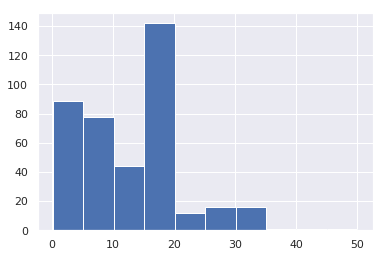

In [840]:
plt.hist(df_imp.tiempo_casa)
plt.show()

In [841]:
print("Okay, we can see that by having a length of " + str(len(df_imp)) + ",")
print("that we have sufficient data to try an model, and that below we no longer have NA values.")
print('---------------------------')
print(dict(df_imp.isnull().sum()))

Okay, we can see that by having a length of 400,
that we have sufficient data to try an model, and that below we no longer have NA values.
---------------------------
{'FAM_N': 0, 'internet': 0, 'agua': 0, 'banco': 0, 'iglesia': 0, 'dejar_hijos': 0, 'cuantas_personas': 0, 'tiempo_casa': 0, 'primer_hijo': 0, 'cuantas_trabajan': 0, 'tiempo_trabajan': 0, 'pierden_colegio': 0, 'ingreso': 0, 'bautizadas': 0, 'DIRECCION': 0, 'PADRE': 0, 'MADRE': 0, 'F': 0, 'M': 0, 'NINOS': 0, 'MAYORES': 0}


### Logistic Regression

Logistic regression is a statistical method that can be used to determines the relationship between one dependent variable and one independent variable, specifically for predicting binary classes. The target variable can only have 2 possible answers and the logistic regression predicts the probability of occurrence of a binary event utilizing a logit function.

Some important factors to keep in mind as we attempt to determine the accuracy of these logit models are:

Accuracy
* ability to predict classifications correctly

Precision
* ability to identify only the relevant data points
* $precision = TruePos / (TruePos + FalsePos)$

Recall
* ability to find all relevant cases in a dataset
* $recall = TruePos/(TruePos + FalseNeg)$

F1
* harmonic mean of precision and recall taking both metrics into account
* $F1 = 2 * ((precision * recall)/(precision + recall))$

ROC Curve:
* receiver operating characteristic curve
* a plot of the true positive rate, showing tradeoff between sensitivity and specificity
* AUC, area under the curve, score is 0 to 1, with 1 being a perfect classifier

#### Logistic Regression: _Bank Account -- Build model and Predict_ 

In [842]:
# Feature Selection:

# Features
feature_cols = ['internet', 'PADRE', 'agua', 'iglesia', 'dejar_hijos','cuantas_personas', 'tiempo_casa', 
                'primer_hijo', 'cuantas_trabajan','tiempo_trabajan', 'pierden_colegio', 'ingreso', 
                'bautizadas','MADRE', 'F', 'M', 'NINOS', 'MAYORES']

X = df_imp[feature_cols]

# Target Variable
y = df_imp.banco

# Train/Test Split
    # 75% for model, 25% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [843]:
# Model Developement:

# create logistic regression classifier object to instanciate model
logreg = LogisticRegression()

# fit model with data
logreg.fit(X_train,y_train)

# prediction
y_pred = logreg.predict(X_test)

[[96  0]
 [ 3  1]]
----------------


Text(0.5, 257.44, 'Predicted')

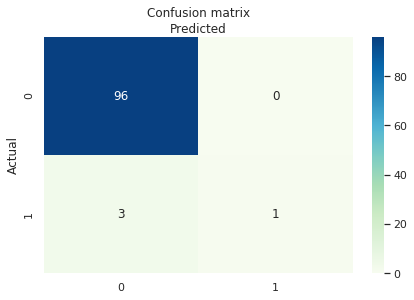

In [844]:
# Model Evaluation using Confusion Matrix

# Basic
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("----------------")

# Complex
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Accuracy: 0.97
Precision: 1.0
Recall: 0.25
F1: 0.4


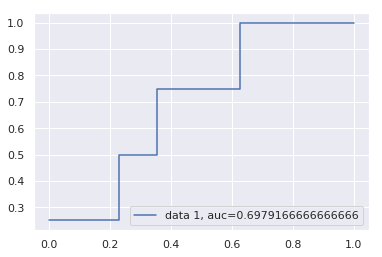

In [845]:
# Confusion Matrix Evaluation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [846]:
# Those values, however, will show that the second parameter is more influential
# consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.

dad_logit = list(np.array(np.std(X_train, 0)* logreg.coef_[0]))
dad_logit_n = feature_cols
dad_logit_d = pd.DataFrame({"names":dad_logit_n, "values":dad_logit, "absval":np.absolute(dad_logit)}).sort_values('absval', ascending=False)
print("----------------------------------")
print("Top 10 Factors Responsible for predicting if they have a bank account")
dad_logit_d.head(10)

----------------------------------
Top 10 Factors Responsible for predicting if they have a bank account


,names,values,absval
16,NINOS,-1.057174,1.057174
14,F,1.054163,1.054163
7,primer_hijo,-0.961856,0.961856
15,M,0.713575,0.713575
11,ingreso,0.695465,0.695465
6,tiempo_casa,-0.613859,0.613859
12,bautizadas,0.386364,0.386364
3,iglesia,-0.261324,0.261324
1,PADRE,-0.261234,0.261234
4,dejar_hijos,0.212341,0.212341


#### Logistic Regression: _Bank Account -- Summary_ 

Logistic regressions struggle when faced with a really lopsided proportion between the binary target variable. This is one of those cases. We see that the model predicted all results to be 0, and though this appears very accurate, it does not imply much intelligence on the part of the model. 

Nevertheless, one number that pops out in the coefficients is the number of females in the house having a strong postivive value in 'predicting' whether someone has a bank account. This could very heuristically confirm thoughts of some of organizations like the Grameen bank, in that women are better stewards of the family financially; but given the limitations of this model I only feel comfortable keeping that in mind and not betting on it by any means.

#### Logistic Regression: _Water Access -- Build model and Predict_ 

In [847]:
# Feature Selection:

# Features
feature_cols = ['internet', 'PADRE', 'banco', 'iglesia', 'dejar_hijos','cuantas_personas', 'tiempo_casa', 
                'primer_hijo', 'cuantas_trabajan','tiempo_trabajan', 'pierden_colegio', 'ingreso', 
                'bautizadas','MADRE', 'F', 'M', 'NINOS', 'MAYORES']

X = df_imp[feature_cols]

# Target Variable
y = df_imp.agua

# Train/Test Split
    # 75% for model, 25% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [848]:
# Model Developement:

# create logistic regression classifier object to instanciate model
logreg = LogisticRegression()

# fit model with data
logreg.fit(X_train,y_train)

# prediction
y_pred = logreg.predict(X_test)

[[ 4 26]
 [ 5 65]]
----------------


Text(0.5, 257.44, 'Predicted')

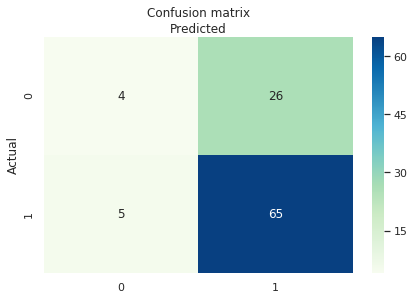

In [849]:
# Model Evaluation using Confusion Matrix

# Basic
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("----------------")

# Complex
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Accuracy: 0.69
Precision: 0.7142857142857143
Recall: 0.9285714285714286
F1: 0.8074534161490684


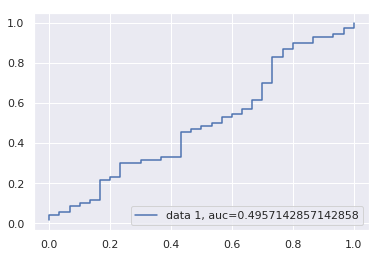

In [850]:
# Confusion Matrix Evaluation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [851]:
# Those values, however, will show that the second parameter is more influential
# consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.

dad_logit = list(np.array(np.std(X_train, 0)* logreg.coef_[0]))
dad_logit_n = feature_cols
dad_logit_d = pd.DataFrame({"names":dad_logit_n, "values":dad_logit, "absval":np.absolute(dad_logit)}).sort_values('absval', ascending=False)
print("----------------------------------")
print("Top 10 Factors Responsible for predicting if there was water access")
dad_logit_d.head(10)

----------------------------------
Top 10 Factors Responsible for predicting if there was water access


,names,values,absval
16,NINOS,0.303589,0.303589
6,tiempo_casa,0.250338,0.250338
11,ingreso,-0.234413,0.234413
17,MAYORES,0.216178,0.216178
5,cuantas_personas,-0.196332,0.196332
14,F,0.168426,0.168426
9,tiempo_trabajan,-0.140180,0.140180
10,pierden_colegio,0.136564,0.136564
15,M,0.134063,0.134063
7,primer_hijo,0.108037,0.108037


#### Logistic Regression: _Water Access -- Summary_ 

Looking toward the logistic regression results for the prediction of water access, we see that we have 67% accuracy, which is largely dragged down by a large number of false positives. The predictive power of this model is moderate to low, however, looking at the coefficient results I want to call a couple things to attention.

Note the time in house coefficient, we can see that the longer someone has been in the house, the more likely they are to have water access. Given our experience in the slums of Pamplona Alta, we see that this could serve as a proxy for where the people live on the mountain. The newest members of Pamplona Alta live higher on the mountain, and the water truck has more difficulty getting to those homes (hence the building of roads for water access). This notion can be heuristically affirmed by the higher number of older people and inverse relationship of income, insofar as income is not why people don't have water, but it is where they are on the mountain. 

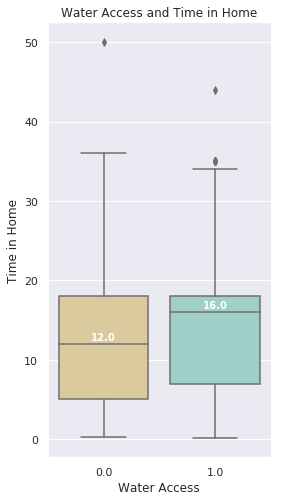

<Figure size 432x288 with 0 Axes>

In [852]:
fig, ax = plt.subplots(figsize=(4,8))
sns.boxplot(data=df, x='agua', y='tiempo_casa', palette='BrBG')
ax.set(xlabel = "Water Access",ylabel = "Time in Home", title = "Water Access and Time in Home")

medians = df.groupby(['agua'])['tiempo_casa'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', color='w', weight='semibold')


plt.show()
plt.clf()

#### Logistic Regression: _Internet Access -- Build model and Predict_ 

In [853]:
# Feature Selection:

# Features
feature_cols = ['agua', 'PADRE', 'banco', 'iglesia', 'dejar_hijos','cuantas_personas', 'tiempo_casa', 
                'primer_hijo', 'cuantas_trabajan','tiempo_trabajan', 'pierden_colegio', 'ingreso', 
                'bautizadas','MADRE', 'F', 'M', 'NINOS', 'MAYORES']

X = df_imp[feature_cols]

# Target Variable
y = df_imp.internet

# Train/Test Split
    # 75% for model, 25% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [854]:
# Model Developement:

# create logistic regression classifier object to instanciate model
logreg = LogisticRegression()

# fit model with data
logreg.fit(X_train,y_train)

# prediction
y_pred = logreg.predict(X_test)

[[84  2]
 [14  0]]
----------------


Text(0.5, 257.44, 'Predicted')

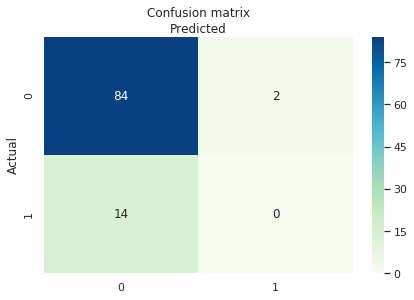

In [855]:
# Model Evaluation using Confusion Matrix

# Basic
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("----------------")

# Complex
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Accuracy: 0.84
Precision: 0.0
Recall: 0.0
F1: 0.0


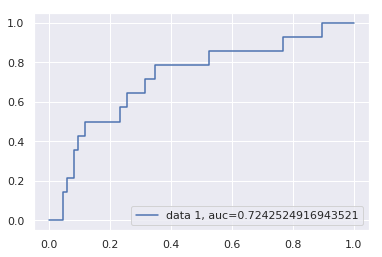

In [856]:
# Confusion Matrix Evaluation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [857]:
# Those values, however, will show that the second parameter is more influential
# consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.

dad_logit = list(np.array(np.std(X_train, 0)* logreg.coef_[0]))
dad_logit_n = feature_cols
dad_logit_d = pd.DataFrame({"names":dad_logit_n, "values":dad_logit, "absval":np.absolute(dad_logit)}).sort_values('absval', ascending=False)
print("----------------------------------")
print("Top 10 Factors Responsible for predicting if there was internet access")
dad_logit_d.head(10)

----------------------------------
Top 10 Factors Responsible for predicting if there was internet access


,names,values,absval
11,ingreso,0.735552,0.735552
14,F,-0.527660,0.527660
15,M,-0.434808,0.434808
7,primer_hijo,-0.358771,0.358771
16,NINOS,0.349746,0.349746
1,PADRE,0.265672,0.265672
6,tiempo_casa,-0.158129,0.158129
3,iglesia,-0.149175,0.149175
5,cuantas_personas,0.124620,0.124620
10,pierden_colegio,0.111948,0.111948


#### Logistic Regression: _Internet Access -- Summary_ 

Knowing only answers to the other survey questions, we were able to predict with 84% accuracy whether a family had access to the internet. Due to the high rate of people not having internet and a meager sample size, our model appeared to be fairly accurate, but not in a provable way. This is shown by our confusion matrix, which shows 0 true positives.

Nevertheless, we can see in the top 10 largest factor coefficients in the logistic regression that income and internet are very closely linked. Confirming previous thoughts that internet was something that only the wealthier (of this poor segment) can afford.

#### Logistic Regression: _Father in Home -- Build model and Predict_

In [858]:
# Feature Selection:

# Features
feature_cols = ['internet', 'agua', 'banco', 'iglesia', 'dejar_hijos','cuantas_personas', 'tiempo_casa', 
                'primer_hijo', 'cuantas_trabajan','tiempo_trabajan', 'pierden_colegio', 'ingreso', 
                'bautizadas','MADRE', 'F', 'M', 'NINOS', 'MAYORES']

X = df_imp[feature_cols].reset_index()

# Target Variable
y = df_imp.PADRE

# Train/Test Split
    # 75% for model, 25% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [859]:
# Model Developement:

# create logistic regression classifier object to instanciate model
logreg = LogisticRegression()

# fit model with data
logreg.fit(X_train,y_train)

# prediction
y_pred = logreg.predict(X_test)

[[31 12]
 [ 3 54]]
----------------


Text(0.5, 257.44, 'Predicted')

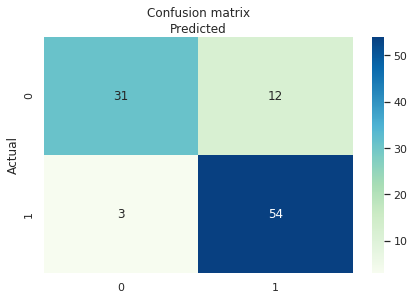

In [860]:
# Model Evaluation using Confusion Matrix

# Basic
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("----------------")

# Complex
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [861]:
# Confusion Matrix Evaluation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.85
Precision: 0.8181818181818182
Recall: 0.9473684210526315
F1: 0.8780487804878049


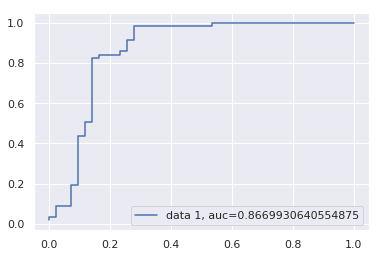

In [862]:
# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [863]:
# Those values, however, will show that the second parameter is more influential
# consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.

dad_logit = list(np.array(np.std(X_train, 0)* logreg.coef_[0]))[1:]
dad_logit_n = list(feature_cols)
dad_logit_d = pd.DataFrame({"names":dad_logit_n, "values":dad_logit, "absval":np.absolute(dad_logit)}).sort_values('absval', ascending=False)
print("----------------------------------")
print("Top 10 Factors Responsible for predicting whether father was in home")
dad_logit_d.head(10)

----------------------------------
Top 10 Factors Responsible for predicting whether father was in home


,names,values,absval
15,M,2.320752,2.320752
16,NINOS,-2.251413,2.251413
14,F,1.686425,1.686425
6,tiempo_casa,-0.400091,0.400091
13,MADRE,-0.361743,0.361743
11,ingreso,0.330013,0.330013
17,MAYORES,-0.265765,0.265765
5,cuantas_personas,0.265124,0.265124
4,dejar_hijos,-0.203270,0.203270
2,banco,-0.145178,0.145178


#### Logistic Regression: _Father in Home -- Summary_

This is interesting. Knowing only answers to the other survey questions, we were able to predict with 84% accuracy whether the father was present in the home or not. We can see by our confusion matrix that this accuracy could improve in terms of false positives (where we predicted wrongly that the fateher was at home). However the fact that with a simple logistic regression model, we can make this accurate of a prediction is pretty good.

We also have determined the top 10 largest factor coefficients in the logistic regression in determining whether the father is present in the home. What this means in laymen's terms is that this is another way to understand the relationship of the father's presence on other variables. 

Given this analysis, we see that having a father present is determined by a positive relationship of all the variables involving household size, essentially, having a father present means a bigger household size and most are children. The income also has a positive coefficient with the father's presence, confirming previous analysis that havin the father home has a significant increase on household income.

__one more visualization to understand father's influence__

In [864]:
w_pops = df.ingreso[df.PADRE == 1]
wo_pops = df.ingreso[df.PADRE == 0]
pops = pd.DataFrame

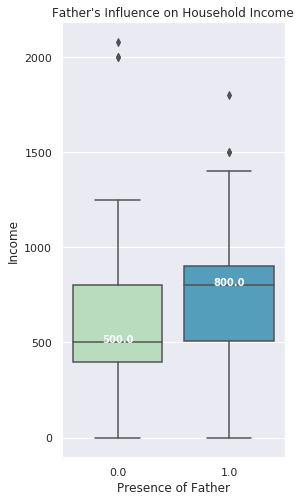

<Figure size 432x288 with 0 Axes>

In [865]:
fig, ax = plt.subplots(figsize=(4,8))
sns.boxplot(data=df, x='PADRE', y='ingreso', palette='GnBu')
ax.set(xlabel = "Presence of Father",ylabel = "Income", title = "Father's Influence on Household Income")

medians = df.groupby(['PADRE'])['ingreso'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', color='w', weight='semibold')


plt.show()
plt.clf()

### Linear Regression

* is a statistical model that examines the linear relationship between a dependent and one or more independent variables a relationship between x and y can be summed up as:
    * $Y’i = mX +b$
    * $depvar = unit * indvar + yint$

* simple linear regression:
    * just an x and y relationship
    * residuals are the differences between the true value of y and the predicted value of y
    * linear regression of a continuous variable is trying to minimize errors and find the line of best fit
* multiple linear regression
    * in most cases, we will have more than one independent variable
    * $Y’i = b0 + b1X1i + b2X2i …$

* Linear Regression with SKLearn
    * SKLearn is the gold standard of ML in python

#### Simple Linear Regression: _Commute Time and Income_

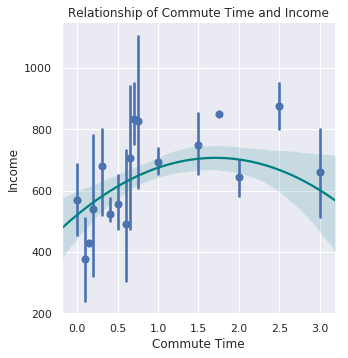

In [866]:
# time to work and income
i = sns.lmplot(data=df,x="tiempo_trabajan", y="ingreso", x_estimator=np.mean, order = 2, line_kws={'color': 'teal'})
i.set(xlabel = "Commute Time",ylabel = "Income", title = "Relationship of Commute Time and Income")
plt.show()

#### Simple Linear Regression & Density Plot: _Household Size and Income_

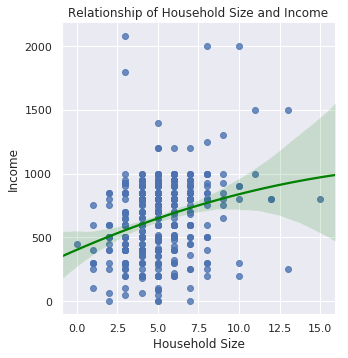

In [867]:
# simple linear regressions
# income and family size
g = sns.lmplot(data=df,x="cuantas_personas", y="ingreso", line_kws={'color': 'green'}, order = 2)
g.set(xlabel = "Household Size",ylabel = "Income", title = "Relationship of Household Size and Income")
plt.show()

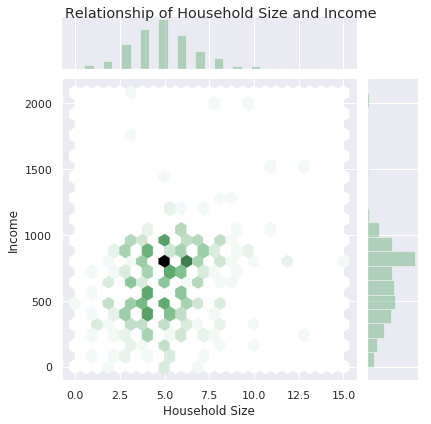

In [868]:
# income and family size
h = sns.jointplot(data = df, x = "cuantas_personas", y = "ingreso", kind = "hex", color = 'g')
h.set_axis_labels("Household Size", "Income")
h.fig.suptitle("Relationship of Household Size and Income")
plt.show()

#### Multiple Linear Regression: _Use All Variable to Predict Income_

In [869]:
X = df_imp.drop(['ingreso', 'FAM_N','DIRECCION'], axis=1)
Y = df_imp.loc[:,"ingreso"]

In [870]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 320.9620672785639
Coefficients: 
 [163.15173962 -18.25188791 274.74958991 -52.61154907 -12.00835403
  31.05563008  -0.84002807   4.82869603  40.13516449  35.71019506
 -16.52464638   4.37632329  82.58582569 -26.55252095   9.92438813
  16.61851182 -14.51156998 -34.99896275]
                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):          1.34e-156
Time:                        16:13:37   Log-Likelihood:                -2786.3
No. Observations:                 400   AIC:                             5609.
Df Residuals:                     382   BIC:                             5680.
Df Model:                          18                                         
Cov

Not stellar explanation of the variance in the model, however not too bad. Lets dive into the coefficients to see what we can learn about how we could predict income with such accuracy.

In [877]:
df_res_ml1 = df_imp
df_res_ml1['ingreso_pred'] = list(predictions)

In [878]:
df_res_ml1['ingreso_pred_diff'] = df_res_ml1['ingreso_pred'] - df_res_ml1['ingreso']

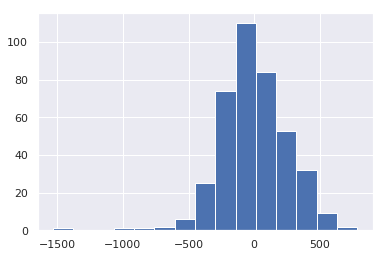

-3.93871809739682


In [885]:
# visualize how far are predictions were off
plt.hist(df_res_ml1['ingreso_pred_diff'], bins = 15)
plt.show()

print(df_res_ml1['ingreso_pred_diff'].mean())

[168.5123285866964,
 -9.739116175004455,
 286.87820228983526,
 -22.895619922372966,
 -6.643753738489577,
 31.231511748552435,
 -0.39941978657239585,
 8.958098672481078,
 46.86825877449506,
 45.02324959029899,
 -16.135928656670636,
 6.473420555141129,
 88.66803647151856,
 113.99801011497526,
 16.27631389106599,
 22.12354408878158,
 -16.560514885368285,
 -49.02663825791331]

In [891]:
# Those values, however, will show that the second parameter is more influential
# consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.

coefs = list(model.params)
cols = list(feature_cols)
mlr_coefs = pd.DataFrame({"names":cols, "values":coefs, "absval":np.absolute(coefs)}).sort_values('absval', ascending=False)
print("----------------------------------")
print("Top 10 Factors Responsible for predicting whether income in household")
mlr_coefs.iloc[:,:2].head(10)


----------------------------------
Top 10 Factors Responsible for predicting whether income in household


,names,values
2,banco,286.878202
0,internet,168.512329
13,MADRE,113.998010
12,bautizadas,88.668036
17,MAYORES,-49.026638
8,cuantas_trabajan,46.868259
9,tiempo_trabajan,45.023250
5,cuantas_personas,31.231512
3,iglesia,-22.895620
15,M,22.123544


Looking at the coefficients is a super important process for us as we attempt to consider options to improve the situations of those living in Pamplona Alta. This output is an incredibly intriguing output that does not offer a straightforward answer given what we've seen with the logistic regression analyses. 

We see, more strongly than ever that to have a bank account has a + S/286 increase on income; and that having internet has a + S/168 coefficient with income. The presence of the mother also plays a big part, but given that over 97% of homes have mothers in them, this statistic is a little tough to act on.

Usually more people being baptized is associated with an increase of income, the more older members in the household actually has a negative coefficient with income. 

It is interesting to see that the more people who work in the house has only a meager + S/46.89 coefficient with income. This could suggest that earning power in most households is distinctly ordinal. There is a bread-winner and from there, every additional worker provides less income to the top line wealth of the household; mutin gthis coefficient. 

The last variable I find significant meaning is is the time from work. The model suggests, that there is an increase in household income the further someone has to travel from their work. This affirms our previous visualizations and beliefs that good jobs, are very far commutes from Pamplona Alta, and if someone wants to make decent money, little opportunty exists within Pamplona Alta.

### Normalize Data to Improve Model

Now, this model is not too bad, but I think we can do better, lets see what model improvements we can do.

1. Normalise your data, i.e., shift it to have a mean of zero, and a spread of 1 standard deviation
2. Turn categorical data into variables via, e.g., OneHotEncoding
3. Do feature engineering:
     * Are my features collinear?
     * Do any of my features have cross terms/higher-order terms?
6. Regularisation of the features to reduce possible overfitting
7. Look at alternative models given the underlying features and the aim of the project


In [789]:
df_imp.describe()

,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,tiempo_trabajan,pierden_colegio,ingreso,bautizadas,PADRE,MADRE,F,M,NINOS,MAYORES
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,0.107500,0.700000,0.03500,0.887500,0.430000,5.23250,13.744500,20.987113,1.306329,1.169034,1.950847,648.975000,2.638122,0.560000,0.970000,2.660000,2.09000,2.767500,0.050000
std,0.310136,0.458831,0.18401,0.316376,0.495696,1.95525,8.730827,4.528090,0.800899,0.657752,2.093993,289.817719,1.773937,0.497009,0.170801,1.234183,1.23925,1.486259,0.229416
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.000000,0.000000,4.00000,6.000000,18.000000,1.000000,0.750000,1.000000,450.000000,2.000000,0.000000,1.000000,2.000000,1.00000,2.000000,0.000000
50%,0.000000,1.000000,0.00000,1.000000,0.000000,5.00000,15.000000,20.000000,1.000000,1.000000,1.950847,690.000000,2.638122,1.000000,1.000000,3.000000,2.00000,3.000000,0.000000
75%,0.000000,1.000000,0.00000,1.000000,1.000000,6.00000,18.000000,23.000000,1.000000,1.500000,2.000000,850.000000,4.000000,1.000000,1.000000,3.000000,3.00000,4.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,15.00000,50.000000,38.000000,7.000000,3.000000,22.000000,2080.000000,10.000000,1.000000,1.000000,8.000000,6.00000,8.000000,2.000000


In [790]:
df_imp.dtypes

FAM_N               category
internet             float64
agua                 float64
banco                float64
iglesia              float64
dejar_hijos          float64
cuantas_personas       int64
tiempo_casa          float64
primer_hijo          float64
cuantas_trabajan     float64
tiempo_trabajan      float64
pierden_colegio      float64
ingreso              float64
bautizadas           float64
DIRECCION           category
PADRE                float64
MADRE                float64
F                    float64
M                    float64
NINOS                float64
MAYORES              float64
dtype: object

In [813]:
# convert float of binaries to integers
w = ['internet','agua','banco','iglesia','dejar_hijos','PADRE','MADRE']
df_imp.loc[:,w] = df_imp.loc[:,w].astype('int')

In [792]:
# convert floats to z score of float for normalization
#z = ['cuantas_personas','tiempo_casa','primer_hijo','cuantas_trabajan','tiempo_trabajan','pierden_colegio','ingreso','bautizadas','F','M','NINOS','MAYORES']
#df_imp.loc[:,z] = df_imp.loc[:,z].apply(zscore)     

In [814]:
z = ['cuantas_personas','tiempo_casa','primer_hijo','cuantas_trabajan','tiempo_trabajan','pierden_colegio','ingreso','bautizadas','F','M','NINOS','MAYORES']

for i in z:
    # = (df_imp.loc[:,i]-df_imp.loc[:,i].mean())/df_imp.loc[:,i].std()
    df_imp.loc[:,i] = (df_imp.loc[:,i]-df_imp.loc[:,i].min())/(df_imp.loc[:,i].max()-df_imp.loc[:,i].min())


In [815]:
df_imp.head()

,FAM_N,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,...,pierden_colegio,ingreso,bautizadas,DIRECCION,PADRE,MADRE,F,M,NINOS,MAYORES
0,792.0,1,0,1,0,0,0.533333,1.000000,0.513514,0.428571,...,0.088675,0.961538,0.6,OTRO CASO,0,1,0.625,0.666667,0.375,0.0
1,791.0,0,1,1,0,1,0.666667,0.397590,0.486486,0.285714,...,0.088675,0.961538,1.0,OTRO CASO,0,1,0.250,0.666667,0.625,0.0
3,793.0,0,1,1,1,1,0.400000,0.002008,0.540541,0.428571,...,0.088675,0.576923,0.3,OTRO CASO,1,1,0.375,0.500000,0.250,0.0
4,234.0,0,1,0,1,1,0.200000,0.357430,0.540541,0.142857,...,0.088675,0.192308,0.2,OTRO CASO,0,1,0.375,0.000000,0.250,0.0
5,794.0,0,0,0,1,0,0.266667,0.056225,0.513514,0.142857,...,0.090909,0.432692,0.0,OTRO CASO,1,1,0.250,0.333333,0.250,0.0


### Run model Again with z-score normalized data

In [816]:
X = df_imp.drop(['ingreso', 'FAM_N','DIRECCION'], axis=1)
Y = df_imp.loc[:,"ingreso"]

In [817]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.1565494027397385
Coefficients: 
 [ 0.07843834 -0.00877495  0.13209115 -0.02529401 -0.00577325  0.22395887
 -0.02011221  0.08589507  0.13507027  0.05150509 -0.17477991  0.02104002
  0.03970472 -0.01276564  0.03817072  0.04793801 -0.05581373 -0.03365285]
                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sun, 25 Nov 2018   Prob (F-statistic):          1.65e-156
Time:                        16:07:39   Log-Likelihood:                 269.56
No. Observations:                 400   AIC:                            -503.1
Df Residuals:                     382   BIC:                            -431.3
Df Model:                          18                                         
Covariance Type:     

Interesting, with min/max normalization we attained the exact same r squared value, with the only change being to minuscule changes to the f-statistic. We may have to explore more options into improving the continuous variable prediction of income model.

In [17]:
# decision tree

In [18]:
# random forest

In [19]:
# variable importance

In [20]:
# ensemble modeling

In [21]:
# root cause analysis

In [22]:
# hierarchical cluster analysis

In [23]:
# k-means cluster analysis

In [24]:
# putting it all together
    # visualizations
    # important factors and indicators
    # groups
    # priority associated to neighborhoods
    # master dataset
    # conclusion, way forward

Solution Ideas:
* Support men
    * How do we help keep men in the household? Because they are better top-line earners and provide significant strength to the family income in a way that allows them to also support bigger families.

* Abuelos y Ninos:
    * Provide support to families with multiple older family members
    * What are the largest obstacles faced by those with long commutes? How could we provide assistance to them in the way of childcare home support so they can go work better paying jobs in the city? What are those jobs? What skills do they require?
    * Could we provide a service to where one could serve the other here????

* Finance & Information
    * Internet and bank accounts are massive indicators of increased wealth, and yes causality is not perfectly determined; however providing education on the usefulness of these resources with the correct connections; along with the psychological efffect of financial planning. Not to mention ending people working only in the dark economy; this gives us further leverage for the government helping people more in the shantytowns by proving their credit/societal worthiness.